In [1]:
import pandas as pd
import numpy as np
import os
import glob
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
filepath = '/fMRI/NLine'
os.chdir(filepath)

In [3]:
subj = ['s_02003', 's_02004']
filenames = {}
for s in subj:
    tmpfilepath = filepath+'/'+s+'/FuncROIS'
    os.chdir(tmpfilepath)
    filenames[s] = glob.glob('*meants.txt')
filenames

{'s_02003': ['Cons_NegPE_Area17_run1_meants.txt',
  'Cons_NegPE_Area17_run2_meants.txt',
  'Cons_NegPE_Area17_run3_meants.txt',
  'Cons_NegPE_Area17_run4_meants.txt',
  'Cons_NegPE_Area20_run1_meants.txt',
  'Cons_NegPE_Area20_run2_meants.txt',
  'Cons_NegPE_Area20_run3_meants.txt',
  'Cons_NegPE_Area20_run4_meants.txt',
  'Cons_NegPE_Area21_run1_meants.txt',
  'Cons_NegPE_Area21_run2_meants.txt',
  'Cons_NegPE_Area21_run3_meants.txt',
  'Cons_NegPE_Area21_run4_meants.txt',
  'Cons_NegPE_Area32_run1_meants.txt',
  'Cons_NegPE_Area32_run2_meants.txt',
  'Cons_NegPE_Area32_run3_meants.txt',
  'Cons_NegPE_Area32_run4_meants.txt',
  'Cons_NegPE_Area47_run1_meants.txt',
  'Cons_NegPE_Area47_run2_meants.txt',
  'Cons_NegPE_Area47_run3_meants.txt',
  'Cons_NegPE_Area47_run4_meants.txt',
  'Cons_NegPE_Area6_run1_meants.txt',
  'Cons_NegPE_Area6_run2_meants.txt',
  'Cons_NegPE_Area6_run3_meants.txt',
  'Cons_NegPE_Area6_run4_meants.txt',
  'Cons_PosPE_Area17_run1_meants.txt',
  'Cons_PosPE_Area

In [4]:
roi_names = {'Area0': 'Frontal_Pole',
             'Area1': 'Insular_Cortex',
             'Area2': 'Superior_Frontal_Gyrus',
             'Area3': 'Middle_Frontal_Gyrus',
             'Area4': 'Inferior_Frontal_Gyrus1',
             'Area5': 'Inferior_Frontal_Gyrus2',
             'Area6': 'Precentral_Gyrus',
             'Area7': 'Temporal_Pole',
             'Area8': 'Superior_Temporal_Gyrus_Ant',
             'Area9': 'Superior_Temporal_Gyrus_Pos',
             'Area10': 'Middle_Temporal_Gyrus_Ant',
             'Area11': 'Middle_Temporal_Gyrus_Pos',
             'Area12': 'Inferior_Temporal_Gyrus_Ant',
             'Area13': 'Inferior_Temporal_Gyrus_TempOcc',             
             'Area14': 'Inferior_Temporal_Gyrus_Pos',
             'Area15': 'Inferior_Temporal_Gyrus_TempOcc',
             'Area16': 'Postcentral_Gyrus',
             'Area17': 'Superior_Parietal_Lobule',
             'Area18': 'Supramarginal_Gyrus_Ant',
             'Area19': 'Supramarginal_Gyrus_Pos',
             'Area20': 'Angular_Gyrus',
             'Area21': 'Lateral_Occipital_Cortex_Sup',
             'Area22': 'Lateral_Occipital_Cortex_Inf',
             'Area23': 'Intracalcarine_Cortex',
             'Area24': 'Frontal_Medial_Cortex',
             'Area25': 'Juxtapositional_Lobule',
             'Area26': 'Subcallosal_Cortex',
             'Area27': 'Paracingulate_Gyrus',
             'Area28': 'Paracingulate_Gyrus',
             'Area29': 'ACC',
             'Area30': 'PCC',
             'Area31': 'Cuneal_Cortex',
             'Area32': 'OFC',
             'Area33': 'Parahippocampal_Gyrus_Ant',
             'Area34': 'Parahippocampal_Gyrus_Pos',
             'Area35': 'Lingual_Gyrus',
             'Area36': 'Temporal_Fusiform_Cortex_Ant',
             'Area37': 'Temporal_Fusiform_Cortex_Pos',
             'Area38': 'Temporal_Occipital_Fusiform_Cortex',
             'Area39': 'Occipital_Fusiform_Gyrus',
             'Area40': 'Frontal_Opercular_Cortex',
             'Area41': 'Central_Opercular_Cortex',
             'Area42': 'Parietal_Opercular_Cortex',
             'Area43': 'Planum_Polare',
             'Area44': 'Heschls_Gyrus',
             'Area45': 'Planum_Temporale',
             'Area46': 'Supracalcarine_Cortex',
             'Area47': 'Occipital_Pole',
             'SubArea10': 'Left_Accumbens',
             'SubArea15': 'Right_Causate',
             'SubArea16': 'Right_Putamen',
             'SubArea17': 'Right_Pallidum',
             'SubArea18': 'Right_Hippocampus',
             'SubArea19': 'Right_Amygdala',
             'SubArea20': 'Right_Accumbens',
             'SubArea4': 'Left_Caudate',
             'SubArea5': 'Left_Putamen',
             'SubArea6': 'Left_Putamen',
             'SubArea8': 'Left_Hippocampus',
             'SubArea9': 'Left_Amygdala',
             'IPS': 'IPS'}

In [5]:
db = pd.read_csv(filenames['s_02003'][0], header=None, names=['a'])
db

,a
0,-0.293948
1,-1.120571
2,-0.923676
3,-3.186403
4,-2.321131
5,-1.418141
6,-0.909158
7,-3.116623
8,-1.627754
9,0.552509


In [6]:
index = [2,4,6,8,10,12,14,16,18,20]
os.chdir(filepath+'/s_02003/FuncROIS')
peristimulus02003 = pd.concat([pd.read_csv(item, names=[item[:-11]]) for item in filenames['s_02003']], axis=1)
peristimulus02003

,Cons_NegPE_Area17_run1,Cons_NegPE_Area17_run2,Cons_NegPE_Area17_run3,Cons_NegPE_Area17_run4,Cons_NegPE_Area20_run1,Cons_NegPE_Area20_run2,Cons_NegPE_Area20_run3,Cons_NegPE_Area20_run4,Cons_NegPE_Area21_run1,Cons_NegPE_Area21_run2,...,Dec_WordPE_Area32_run3,Dec_WordPE_Area32_run4,Dec_WordPE_Area47_run1,Dec_WordPE_Area47_run2,Dec_WordPE_Area47_run3,Dec_WordPE_Area47_run4,Dec_WordPE_Area6_run1,Dec_WordPE_Area6_run2,Dec_WordPE_Area6_run3,Dec_WordPE_Area6_run4
0,-1.290830,0.671643,-2.069099,-0.369912,-1.436346,2.092710,-1.871232,0.425044,-1.155887,1.959067,...,-0.000738,-0.113393,0.428243,0.509339,0.322243,0.162020,0.491551,0.173685,0.294939,0.037179
1,-1.843488,2.683637,-2.527805,-0.332153,-2.645434,6.115441,-2.729729,-0.909133,-2.013928,7.274793,...,0.272503,0.208824,1.472894,1.755110,1.097356,1.083457,2.430026,1.936570,1.511326,1.357073
2,-1.276399,4.005671,-0.558162,-0.123253,-0.763608,8.988696,-3.109569,-1.133879,-1.442226,9.008547,...,0.298832,0.350122,2.105236,2.241813,1.870854,1.736913,2.525080,2.621363,2.235981,1.826049
3,-3.834418,4.713046,-2.155790,-1.924538,0.625311,8.672382,-4.313032,-1.625557,-3.304218,8.710102,...,-0.066444,0.266347,0.800000,1.135858,1.131081,1.421497,1.057228,1.402368,0.518154,1.172097
4,-4.971749,5.748615,-5.074839,-4.437882,0.701798,9.155598,-4.585342,-1.256105,-4.328359,9.702135,...,-0.082639,-0.328554,-0.177951,-0.453033,0.343521,-0.095651,0.346344,0.431483,-0.477306,-0.098323
5,-3.413622,2.537247,-4.496256,-4.410488,0.497950,5.547452,-3.257206,-1.700667,-3.435407,6.161847,...,0.095472,0.117205,-0.288703,-1.301929,0.032413,-0.625976,0.338953,-0.107865,-0.418068,-0.608437
6,-3.273120,1.093770,-2.831541,-1.437586,-1.032057,1.885658,-1.597816,-0.469391,-4.052755,1.865239,...,0.152872,0.122048,0.083253,-0.820442,0.291045,-0.485259,0.370813,-0.033810,0.084044,-0.641175
7,-0.869367,-0.472508,-1.509066,-0.473143,0.544670,-3.153341,0.387794,-1.410201,-2.867874,-2.617500,...,-0.058889,-0.126289,0.553222,-0.476485,0.387743,-0.213438,0.884640,-0.083336,0.521862,-0.166157
8,2.170278,-1.745754,-0.601648,-1.388972,2.605690,-4.812211,0.130067,-2.734583,1.000147,-3.981167,...,0.178175,-0.093610,0.486585,-0.129202,0.723363,-0.075365,0.395641,-0.081620,0.549310,-0.148025
9,1.819927,-1.133592,0.266071,-1.051311,1.706294,-2.258548,0.926197,-2.683840,1.611396,-2.351431,...,-0.109597,0.087550,0.217891,-0.000793,0.475182,-0.299617,0.052195,-0.119403,0.627845,-0.365336


In [7]:
os.chdir(filepath+'/s_02004/FuncROIS')
peristimulus02004 = pd.concat([pd.read_csv(item, names=[item[:-11]]) for item in filenames['s_02004']], axis=1)
peristimulus02004

,Cons_NegPE_Area17_run1,Cons_NegPE_Area17_run2,Cons_NegPE_Area17_run3,Cons_NegPE_Area17_run4,Cons_NegPE_Area20_run1,Cons_NegPE_Area20_run2,Cons_NegPE_Area20_run3,Cons_NegPE_Area20_run4,Cons_NegPE_Area21_run1,Cons_NegPE_Area21_run2,...,Dec_WordPE_Area32_run3,Dec_WordPE_Area32_run4,Dec_WordPE_Area47_run1,Dec_WordPE_Area47_run2,Dec_WordPE_Area47_run3,Dec_WordPE_Area47_run4,Dec_WordPE_Area6_run1,Dec_WordPE_Area6_run2,Dec_WordPE_Area6_run3,Dec_WordPE_Area6_run4
0,-0.293948,-3.543782,7.917248,7.057982,1.410695,-1.370714,4.769897,6.025301,3.274496,-2.699140,...,0.349116,0.269763,0.533558,0.389904,0.736973,-0.060388,1.008810,0.857345,0.541298,0.728945
1,-1.120571,-1.044411,8.586057,6.695622,-0.099126,-1.139402,3.606585,5.710903,4.233648,-0.639052,...,0.172743,0.466392,0.576146,0.467562,0.622426,0.726444,1.631127,0.989382,1.220195,1.524399
2,-0.923676,0.616338,15.681029,4.794441,0.893442,0.950650,5.919290,3.326671,3.642179,1.273481,...,0.197530,0.655679,0.419073,-0.007402,1.034308,1.393879,1.346008,0.511050,0.725462,0.670118
3,-3.186403,-0.061128,10.460984,1.561368,-1.576468,1.601457,2.185681,0.016254,-0.486236,1.353626,...,0.291804,0.136841,0.607416,0.195645,0.819057,0.429875,-0.219740,-0.774357,-0.530598,-0.409208
4,-2.321131,1.722956,5.898641,-2.883964,-1.645137,3.421457,0.874501,-2.422519,-1.469117,2.298944,...,0.078019,0.575317,-0.083494,-0.593169,-0.567093,-0.542748,-0.330742,-0.313009,-0.689351,-0.252277
5,-1.418141,2.128533,7.880878,-4.626005,1.326017,5.909634,2.800995,-3.266472,-0.165637,4.920290,...,0.362460,0.486682,-0.257337,-0.716577,-0.129187,-0.420382,-0.339044,-0.509639,-0.479334,-0.146229
6,-0.909158,2.539502,11.585945,-4.886758,2.394300,6.507146,5.594578,-3.364325,-0.478142,5.075036,...,0.245468,0.243346,-0.554112,-0.380546,-0.047300,0.421743,-0.377871,0.195221,-0.056252,-0.153018
7,-3.116623,1.265103,6.712964,0.716887,0.171772,5.780726,3.125950,-0.006448,-1.685129,3.036876,...,0.261501,0.308249,0.453633,-0.270492,0.907412,0.739209,-0.208808,-0.137662,0.108393,-0.036310
8,-1.627754,-0.083778,4.969686,0.873710,0.478419,4.453291,3.071443,0.132983,-0.743549,1.501480,...,-0.051462,-0.074365,-0.038717,0.466064,0.247743,0.061476,-0.165255,-0.529465,-0.148712,-0.096818
9,0.552509,1.588017,2.699096,0.840292,1.395202,2.499960,0.057966,-0.430506,0.695273,0.748978,...,0.191224,0.053720,0.503841,0.001779,0.068360,0.397985,-0.143050,-0.262543,-0.158513,-0.367351


In [8]:
peristimulus02003['Subj'] = 'S_02003'
peristimulus02004['Subj'] = 'S_02004'
peristimulus02003['Time'] = index
peristimulus02004['Time'] = index
peristimulus02003.set_index('Subj', append=True, inplace=True)
peristimulus02004.set_index('Subj', append=True, inplace=True)
peristimulus02003.set_index('Time', append=True, inplace=True)
peristimulus02004.set_index('Time', append=True, inplace=True)

In [9]:
peristimulus02003.reorder_levels(['Subj', 'Time', None])

Cons_NegPE_Area17_run1  Cons_NegPE_Area17_run2  \
Subj    Time                                                     
S_02003 2    0               -1.290830                0.671643   
        4    1               -1.843488                2.683637   
        6    2               -1.276399                4.005671   
        8    3               -3.834418                4.713046   
        10   4               -4.971749                5.748615   
        12   5               -3.413622                2.537247   
        14   6               -3.273120                1.093770   
        16   7               -0.869367               -0.472508   
        18   8                2.170278               -1.745754   
        20   9                1.819927               -1.133592   

                Cons_NegPE_Area17_run3  Cons_NegPE_Area17_run4  \
Subj    Time                                                     
S_02003 2    0               -2.069099               -0.369912   
        4    1               -2.527805               -0.332153   
        6    2               -0.558162               -0.123253   
        8    3               -2.155790               -1.924538   
        10   4               -5.074839               -4.437882   
        12   5               -4.496256               -4.410488   
        14   6               -2.831541               -1.437586   
        16   7               -1.509066               -0.473143   
        18   8               -0.601648               -1.388972   
        20   9                0.266071               -1.051311   

                Cons_NegPE_Area20_run1  Cons_NegPE_Area20_run2  \
Subj    Time                                                     
S_02003 2    0               -1.436346                2.092710   
        4    1               -2.645434                6.115441   
        6    2               -0.763608                8.988696   
        8    3                0.625311                8.672382   
        10   4                0.701798                9.155598   
        12   5                0.497950                5.547452   
        14   6               -1.032057                1.885658   
        16   7                0.544670               -3.153341   
        18   8                2.605690               -4.812211   
        20   9                1.706294               -2.258548   

                Cons_NegPE_Area20_run3  Cons_NegPE_Area20_run4  \
Subj    Time                                                     
S_02003 2    0               -1.871232                0.425044   
        4    1               -2.729729               -0.909133   
        6    2               -3.109569               -1.133879   
        8    3               -4.313032               -1.625557   
        10   4               -4.585342               -1.256105   
        12   5               -3.257206               -1.700667   
        14   6               -1.597816               -0.469391   
        16   7                0.387794               -1.410201   
        18   8                0.130067               -2.734583   
        20   9                0.926197               -2.683840   

                Cons_NegPE_Area21_run1  Cons_NegPE_Area21_run2  \
Subj    Time                                                     
S_02003 2    0               -1.155887                1.959067   
        4    1               -2.013928                7.274793   
        6    2               -1.442226                9.008547   
        8    3               -3.304218                8.710102   
        10   4               -4.328359                9.702135   
        12   5               -3.435407                6.161847   
        14   6               -4.052755                1.865239   
        16   7               -2.867874               -2.617500   
        18   8                1.000147               -3.981167   
        20   9                1.611396               -2.351431   

                        ...            Dec_WordPE_A

In [10]:
peristimulus02004.reorder_levels(['Subj', 'Time', None])

Cons_NegPE_Area17_run1  Cons_NegPE_Area17_run2  \
Subj    Time                                                     
S_02004 2    0               -0.293948               -3.543782   
        4    1               -1.120571               -1.044411   
        6    2               -0.923676                0.616338   
        8    3               -3.186403               -0.061128   
        10   4               -2.321131                1.722956   
        12   5               -1.418141                2.128533   
        14   6               -0.909158                2.539502   
        16   7               -3.116623                1.265103   
        18   8               -1.627754               -0.083778   
        20   9                0.552509                1.588017   

                Cons_NegPE_Area17_run3  Cons_NegPE_Area17_run4  \
Subj    Time                                                     
S_02004 2    0                7.917248                7.057982   
        4    1                8.586057                6.695622   
        6    2               15.681029                4.794441   
        8    3               10.460984                1.561368   
        10   4                5.898641               -2.883964   
        12   5                7.880878               -4.626005   
        14   6               11.585945               -4.886758   
        16   7                6.712964                0.716887   
        18   8                4.969686                0.873710   
        20   9                2.699096                0.840292   

                Cons_NegPE_Area20_run1  Cons_NegPE_Area20_run2  \
Subj    Time                                                     
S_02004 2    0                1.410695               -1.370714   
        4    1               -0.099126               -1.139402   
        6    2                0.893442                0.950650   
        8    3               -1.576468                1.601457   
        10   4               -1.645137                3.421457   
        12   5                1.326017                5.909634   
        14   6                2.394300                6.507146   
        16   7                0.171772                5.780726   
        18   8                0.478419                4.453291   
        20   9                1.395202                2.499960   

                Cons_NegPE_Area20_run3  Cons_NegPE_Area20_run4  \
Subj    Time                                                     
S_02004 2    0                4.769897                6.025301   
        4    1                3.606585                5.710903   
        6    2                5.919290                3.326671   
        8    3                2.185681                0.016254   
        10   4                0.874501               -2.422519   
        12   5                2.800995               -3.266472   
        14   6                5.594578               -3.364325   
        16   7                3.125950               -0.006448   
        18   8                3.071443                0.132983   
        20   9                0.057966               -0.430506   

                Cons_NegPE_Area21_run1  Cons_NegPE_Area21_run2  \
Subj    Time                                                     
S_02004 2    0                3.274496               -2.699140   
        4    1                4.233648               -0.639052   
        6    2                3.642179                1.273481   
        8    3               -0.486236                1.353626   
        10   4               -1.469117                2.298944   
        12   5               -0.165637                4.920290   
        14   6               -0.478142                5.075036   
        16   7               -1.685129                3.036876   
        18   8               -0.743549                1.501480   
        20   9                0.695273                0.748978   

                        ...            Dec_WordPE_A

In [11]:
peristimulus = pd.concat([peristimulus02003, peristimulus02004], axis=0)
peristimulus = peristimulus.reorder_levels(['Subj', 'Time', None])
peristimulus

Cons_NegPE_Area17_run1  Cons_NegPE_Area17_run2  \
Subj    Time                                                     
S_02003 2    0               -1.290830                0.671643   
        4    1               -1.843488                2.683637   
        6    2               -1.276399                4.005671   
        8    3               -3.834418                4.713046   
        10   4               -4.971749                5.748615   
        12   5               -3.413622                2.537247   
        14   6               -3.273120                1.093770   
        16   7               -0.869367               -0.472508   
        18   8                2.170278               -1.745754   
        20   9                1.819927               -1.133592   
S_02004 2    0               -0.293948               -3.543782   
        4    1               -1.120571               -1.044411   
        6    2               -0.923676                0.616338   
        8    3               -3.186403               -0.061128   
        10   4               -2.321131                1.722956   
        12   5               -1.418141                2.128533   
        14   6               -0.909158                2.539502   
        16   7               -3.116623                1.265103   
        18   8               -1.627754               -0.083778   
        20   9                0.552509                1.588017   

                Cons_NegPE_Area17_run3  Cons_NegPE_Area17_run4  \
Subj    Time                                                     
S_02003 2    0               -2.069099               -0.369912   
        4    1               -2.527805               -0.332153   
        6    2               -0.558162               -0.123253   
        8    3               -2.155790               -1.924538   
        10   4               -5.074839               -4.437882   
        12   5               -4.496256               -4.410488   
        14   6               -2.831541               -1.437586   
        16   7               -1.509066               -0.473143   
        18   8               -0.601648               -1.388972   
        20   9                0.266071               -1.051311   
S_02004 2    0                7.917248                7.057982   
        4    1                8.586057                6.695622   
        6    2               15.681029                4.794441   
        8    3               10.460984                1.561368   
        10   4                5.898641               -2.883964   
        12   5                7.880878               -4.626005   
        14   6               11.585945               -4.886758   
        16   7                6.712964                0.716887   
        18   8                4.969686                0.873710   
        20   9                2.699096                0.840292   

                Cons_NegPE_Area20_run1  Cons_NegPE_Area20_run2  \
Subj    Time                                                     
S_02003 2    0               -1.436346                2.092710   
        4    1               -2.645434                6.115441   
        6    2               -0.763608                8.988696   
        8    3                0.625311                8.672382   
        10   4                0.701798                9.155598   
        12   5                0.497950                5.547452   
        14   6               -1.032057                1.885658   
        16   7                0.544670               -3.153341   
        18   8                2.605690               -4.812211   
        20   9                1.706294               -2.258548   
S_02004 2    0                1.410695               -1.370714   
        4    1               -0.099126               -1.139402   
        6    2                0.893442                0.950650   
        8    3               -1.576468                1.601457   
        10   4               -1.645137                

In [12]:
peristimulus.loc['S_02003']['Cons_NegPE_Area17_run1']

Time   
2     0   -1.290830
4     1   -1.843488
6     2   -1.276399
8     3   -3.834418
10    4   -4.971749
12    5   -3.413622
14    6   -3.273120
16    7   -0.869367
18    8    2.170278
20    9    1.819927
Name: Cons_NegPE_Area17_run1, dtype: float64

In [13]:
from pylab import *
import matplotlib.pyplot as plt

In [14]:
import string

In [15]:
start = filenames['s_02003'][0].find('A')

In [16]:
end = filenames['s_02003'][0][start:].find('_')
end

6

In [17]:
area = filenames['s_02003'][0][start:start+end]
area

'Area17'

In [18]:
area_name = roi_names[area]
area_name

'Superior_Parietal_Lobule'

In [21]:
tit = filenames['s_02003'][0][0:start-3]+'_'+area_name+filenames['s_02003'][0][start+end:-11]
tit

'Cons_Neg_Superior_Parietal_Lobule_run1'

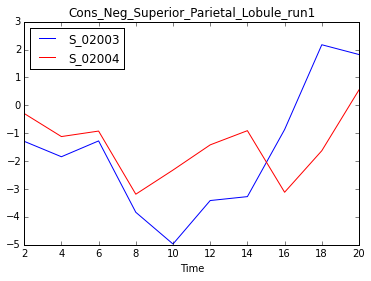

In [22]:
plot(index,peristimulus.loc['S_02003']['Cons_NegPE_Area17_run1'], color='blue', label='S_02003')
plot(index,peristimulus.loc['S_02004']['Cons_NegPE_Area17_run1'], color='red', label='S_02004')
xlabel('Time')
legend(loc=2)
title(tit)
savefig('test.jpg')

## Before plotting for real change directory to plotting folder

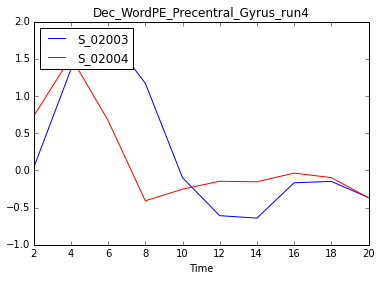

In [23]:
os.chdir('/fMRI/NLine/Peristimulus')
for cond in peristimulus.keys():
    start = cond.find('A')
    end = cond[start:].find('_')
    area = cond[start:start+end]
    area_name = roi_names[area]
    tit = cond[0:start]+area_name+cond[start+end:]
    clf()
    plot(index,peristimulus.loc['S_02003'][cond], color='blue', label='S_02003')
    plot(index,peristimulus.loc['S_02004'][cond], color='red', label='S_02004')
    xlabel('Time')
    legend(loc=2)
    title(tit)
    fname = tit+'.jpg'
    savefig(fname)
    close